# Problem set 1: Financial Frictions, Liquidity and the Business Cycle

In [1]:
import numpy as np
import math
from scipy import optimize
import scipy.stats as stats
import PS1_1functions as func

import scipy.stats as stats

# For plots:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('seaborn-whitegrid')
mpl.style.use('seaborn')
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Exercise 3.5 in JT (The Theory of Corporate Finance)

Consider the continuous the continuous investment model with decreasing returns to scale outlined in chapter 3 of JT. The core of the model is as follows:
- Let $I\in[0, \infty)$ be the level of investment in a given project.
- Entrepreneur proposes a project. If successful the project generates income $R(I)$; if not the project generates $0$.
- The probability of success depends on the behavior of the entrepreneur. If E behaves $(b)$ then probability of success is $p_H\in(0,1)$. If E does not behave $(nb)$ then the probability of success is $p_L$ where $0\leq p_L<p_H$. 
- The entrepreneur has an incentive to not behave $(nb)$, as he receives $BI$ in private benefits in this case.
- The entrepreneur is endowed with A in assets.
- No investment project is profitable, if entrepreneur chooses not to behave. 
- The entrepreneur's technology obeys the following conditions:
    1. Positive, but decreasing returns to investments: $R'(I)>0, R''(I)<0$. 
    2. *Regularity condition 1:* Under perfect information a positive investment level would be optimal, i.e. $R'(0)>1/p_H$. 
    3. *Regularity condition 2:* Under perfect information a finite level of investment is optiaml, i.e. $ lim_{I\rightarrow \infty} R'(I) < 1/p_H$. 
- Assume perfect competition between lenders.
    


#### The Entrepreneurial problem, part I

The first part of the entrepreneur's problem is the discrete choice: $b$ or $nb$. The utility from each choice is given by:

$$\begin{align} 
u_b &= p_HR_b(I)-A \\
u_{nb}&= p_LR_b(I)+BI-A.
\end{align}$$

The **incentive compatability constraint (IC)** is the threshold when option $b$ is preferred. This is defined as:

$$\begin{align}
u_b-u_{nb}\geq 0 && \Rightarrow && \Delta p R_b(I) \geq BI, \tag{IC}
\end{align}$$

where $\Delta p \equiv p_H-p_L$.

#### The lender's problem:

The lender faces two problems here: (1) Risk over outcomes and (2) Moral hazard. The moral hazard comes from the entrepreneur who has an incentive to not behave, due to the potential private benfits BI. Note two observations before we set up the lender's problem:

1. The project is never profitable if the entrepreneur chooses not to behave. This implies that the **(IC)** constraint must always hold. This means that the contract $R_b(I)$ must at least secure:

$$\begin{align} 
    R_b^* = \dfrac{BI}{\Delta p}.
\end{align}$$

2. We assume that lenders operate under perfect competition. Thus in equilibrium the expected profits of a lender is driven to zero. 

With this in mind define the expected profits from the lender $\pi_l^e$ as:

$$\begin{align}
\pi_l^e = p_H \left[R(I)-R_b\right]-\left(I-A\right)\geq0 \tag{IR}
\end{align}$$

Here we have used: (1) The lender will always make sure that the entrepreneur chooses $b$. Thus we only use $p_H$ as probability of success. (2) The lender offers $I-A$ for the project, as the entrepreneur puts up $A$ himself. The lender thus only enters into any contract, if his **rationality constraint (IR)** holds, i.e. if $\pi_l^e\geq0$. 


#### The Entrepreneurial problem, part II

The entrepreneur knows that to land a contract, lender will always offer a contract ensuring that the **(IC)** constraint holds. Thus he only considers the outcomes where he behaves. Using that there are perfect competition for lenders, the entrepreneur chooses an $I$, such that the **(IR)** constraint holds with equality. The utility in this scenario for the entrepreneur is then given by:

$$\begin{align} 
    u_b &= p_H R_b(I) -A \\ 
        &= p_H R(I)-I,
\end{align}$$ 
where $p_HR_b(I)$ is substituted for using the **(IR)** constraint. The problem of the entrepreneur that recognizes all of the above is then given by:


$$ \begin{align} 
    \max_{I} p_HR(I)-I, && \text{s.t. }\overbrace{p_H\left[R(I)-\dfrac{BI}{\Delta p}\right]}^{\text{IR constraint s.t. IC constraint}}\geq I-A
\end{align}$$ 

The constraint states that the entrepreneur recognizes the IR constraint of the lender **and** that the lender offers an **IC** binding contract. Denote this the **(IR-IC)** constraint.

The first order condition characterizing the solution is then given by:

$$ \begin{align} 
    p_HR'(I) &= 1+\dfrac{\mu}{1+\mu} \dfrac{p_HB}{\Delta p}\geq 1,  \tag{FOC 1} 
\end{align} $$

along with the Karush-Kuhn-Tucker conditions

$$ \begin{align} 
    \mu\left[p_H\left(R(I)-\dfrac{BI}{\Delta p}\right)-(I-A)\right]=0, && \mu\geq 0, &&  p_H\left(R(I)-\dfrac{BI}{\Delta p}\right)-(I-A)\geq 0 \tag{FOC 2 / KKT}
\end{align} $$






.


## Q1: How does investments vary with assets A?

Let us start with some comments on the solution: 
* Note that if the **(IR-IC)** constraint is **not** binding, the shadow-variable $\mu=0$ and the optimum is given by $p_HR'(I) =1$.
* If the **(IR-IC)** constraint **is** binding, the level of $I$ is determined entirely from the **(IR-IC)** constraint.

To illustrate the solution, choose a type of technology function $R(I)$ and parameter values. Note the following conventions:
* Rtype can so far be of types 'sqroot' (sq), 'ln' (ln) or 'FlexiblePower' (fp). The three versions imply the following technologies:

$$\begin{align} 
    &\text{For }(sq): && R(I)=\sqrt{I} \\ 
    &\text{For }(ln): && R(I)=ln(I) \\ 
    &\text{For }(fp): && R(I)=I^p
\end{align}$$

In the following $p$ denotes the power used in the (fp) case. 
* We require $1>p_H>p_L>0$ and $p\in(0,1)$.

**1: Define variables**

In [8]:
Rtype = 'FlexiblePower'
pH = 0.8
pL = 0.5
B = 2
p = 0.3

**2: Create a grid of assets and define the level of investments (I) implied by the IC constraint**

In [9]:
Amin = 0 #minimum level of A to test
Amax = 2 # maximum level of A to test
N_A = 100 # How many levels of A between Amin and Amax to test
A = np.linspace(Amin,Amax,N_A) # creates a linearly spaced grid from Amin to Amax with N_A steps.
sol_IC = func.IR_constraint(Rtype,pH,pL,B,A,p) # User-defined function that solves for the investment level I, for each value of A from the array defined above.

**3: Define the level of investments that are optimal if the IC constraint is not binding**

This is given by (FOC 1) where the shadow-variable $\mu=0$. Note that this is independent of A

In [10]:
sol_unconstrained = func.Istar(Rtype, pH, p)*np.ones(A.size) # User-defined function that solves for I* in unconstrained case. Re-defined as a vector of same size as A, to plot below. 

**4: Plot the two functions**

Note that the IC constraint is violated **if** A is relatively small. Thus the *equilbrium investment behavior* is defined as the minimum of the two functions.

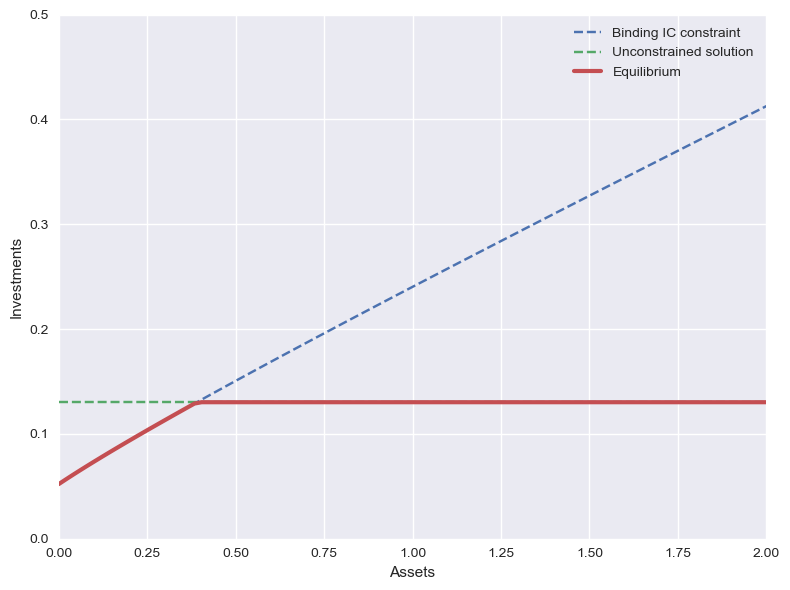

In [11]:
# OPTIMAL FUNCTION:
sol_equilibrium = np.minimum(sol_IC, sol_unconstrained)

fig = plt.figure(frameon=False, figsize=(8, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.plot(A, sol_IC, linestyle='--')
ax.plot(A, sol_unconstrained, linestyle='--')
ax.plot(A, sol_equilibrium, linewidth=3)

ax.set_xlim([Amin, math.ceil(Amax)])

# This little code makes sure the scale of the y-axis is consistent with level of variables: 
y_level = len(str(abs(int(max(sol_IC))))) # counts the number of digits (before .)
if max(sol_IC)<1:
    ax.set_ylim([0, (math.ceil(10*max(sol_IC))/10)])
else:
    ax.set_ylim([0, (math.ceil(10**(y_level-1)*max(sol_IC))/(10**(y_level-1)))])
    
# Labels:
ax.set_xlabel('Assets')
ax.set_ylabel('Investments')

# Legend:
plt.legend(('Binding IC constraint', 'Unconstrained solution', 'Equilibrium'),
           loc='upper right')

# Add a cool layout
fig.tight_layout()

#def update(pL=0.5,B=2):
#    sol_IC = func.IR_constraint(Rtype,pH,pL,B,A,p)
#    ax.plot(A,sol_IC)

#widgets.interact(update, pL = widgets.FloatSlider(
#                            description="$p_L$", min=0.1, max=0.5, step=0.05, value=0.5),
#                         B = widgets.FloatSlider(
#                            description="$B$", min=1, max=5, step=1, value=2),
#                );


**Results/comments:**

* If $A$ is sufficiently large $\Rightarrow \mu=0$ and $I$ is efficiently chosen.
* If not $\mu>0$ and investments are suboptimally low. The reason for this is the **moral hazard** of the scheme:
    * The entrepreneur receives private benefits of $BI$ from not behaving.
    * If $A$ is low entrepreneurs have to borrow a lot. 
    * The private benefits from not behaving increases linearly with I; thus the lender has to offer a contract with linearly increasing benefits $R_b$ to avoid the bad behavior. 
    * For the lender to avoid negative profits (IR constraint), the price of borrowing is increased. 
    * The marginal benefits of the loan decreases with the size $(R''(I)<0)$. Thus if the loan is too large the optimal level $I^*$ will not be financed.
    
If you are further interested in how the optimal solution looks like, you can compare the baseline case, with a new instance below:

In [6]:
# New parameter values:
Rtype = 'FlexiblePower'
pH2 = 0.9
pL2 = 0.8
B2 = 2
p2 = 0.3

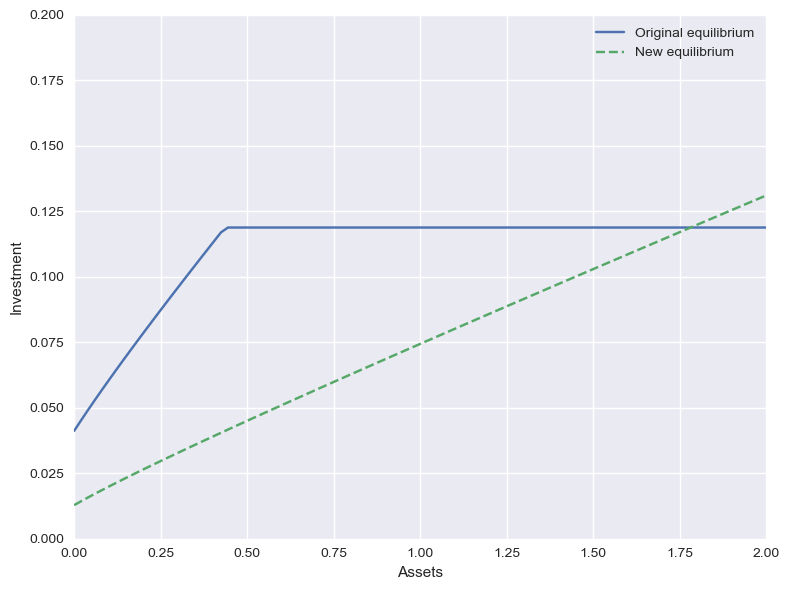

In [7]:
sol_IC2 = func.IR_constraint(Rtype,pH2,pL2,B2,A,p2)
sol_unconstrained2 = func.Istar(Rtype, pH2, p2)*np.ones(A.size)
sol_equilibrium2 = np.minimum(sol_IC2, sol_unconstrained2)


fig = plt.figure(frameon=False, figsize=(8,6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(A, sol_equilibrium)
ax.set_xlim([Amin, math.ceil(Amax)])
ax.plot(A, sol_equilibrium2, linestyle='--')


# This little code makes sure the scale of the y-axis is consistent with level of variables: 
y_level = len(str(abs(int(max(np.concatenate((sol_equilibrium, sol_equilibrium2))))))) # counts the number of digits (before .)
if max(sol_IC)<1:
    ax.set_ylim([0, (math.ceil(10*max(np.concatenate((sol_equilibrium, sol_equilibrium2))))/10)])
else:
    ax.set_ylim([0, (math.ceil(10**(y_level-1)*max(np.concatenate((sol_equilibrium, sol_equilibrium2))))/(10**(y_level-1)))])


# Labels:
ax.set_xlabel('Assets')
ax.set_ylabel('Investment')

# Legend:
plt.legend(('Original equilibrium', 'New equilibrium'),
           loc='upper right')
fig.tight_layout()


## Q2: How does the shadow-value of assets vary with A?

Let us start by defining how the optimal choice of investments $(I)$ change with A:

* If the IC constraint is not binding (when A is large), I was independent of A. Define the threshold $\bar{A}$ as the level where the IC constraint is no longer binding.
* If the IC constraint is binding, A increases $I$. Define the implicit function $I(A)$. By total differentiation of IC we then have:

$$ \begin{align}
    p_H\left[R'(I) -\dfrac{B}{\Delta p}\right]\dfrac{dI}{dA} = \dfrac{dI}{dA}-1, && \text{for }A<\bar{A},
\end{align} $$ 

and otherwise 0. Isolating for $dI/dA$ we then have:

$$\begin{align} 
    \dfrac{dI}{dA} = \dfrac{1}{1-p_HR'(I)+\frac{p_HB}{\Delta p}}> 0, && \text{for }A<\bar{A}, \tag{MMIE}
\end{align} $$

where the denominator is positive. To see this substitute for (FOC 1) to get

$$ \begin{align}
1-p_HR'(I) + \frac{pH B}{\Delta p} = \underbrace{-\dfrac{\mu}{1+\mu}\dfrac{p_HB}{\Delta p}}_{\text{from FOC 1}}+\dfrac{p_HB}{\Delta p}  = \dfrac{p_HB}{\Delta p}\dfrac{1}{1+\mu}>0
\end{align} $$


Finally, what is then the shadow value of A? Differentiate the utility function:

$$ \begin{align} 
    \dfrac{du_b}{dA} &= \left[p_HR'(I)-1\right]\dfrac{dI}{dA} \\ 
                     &= \underbrace{\dfrac{\mu}{1+\mu}\dfrac{p_H B}{\Delta p}}_{\text{From FOC 1}}\dfrac{dI}{dA}. \tag{SVE}
\end{align} $$


**Comments for the results:**

* When $A>\bar{A}: du/dA=0$. When A is large enough the optimal level of investments is ensured; sufficient access to credit.
* When $A<\bar{A}: du/dA>0$. When the entrepreneur is constrained in his investment, an increase in A relaxes credit constraint. 
* The term $dI/dA$ in $(MMIE)$ is the Marginal Multiplier of Initial Equity. 
* The term $du/dA$ in $(SVE)$ is the Shadow Value of Equity. In the face of imperfect information and moral hazard, the famous Modigliani and Miller (1963) result that the source of financing does not matter, breaks down. 





# Exercise 6.1 in JT: Privately known private benefit and market breakdown

Let us start with a brief outline of the setup (from section 6.2), compared to exercise 3.5 (a lot of is the same, will not be repeated here):

* Two types of entrepreneurs: Good and bad types with private benefits of not behaving $B_H>B_L$. (good type has $B_L$)
* No equity (A=0),
* Investment is not continuous, but either 0 or I.
* Investment is either successfull (return R) or not (return 0).
* Capital markets put probability $\alpha\in(0,1)$ on type 'good' and $1-\alpha$ on type 'bad'. 
* Regulary conditions:

$$ \begin{align}
    p_H\left(R-\dfrac{B_H}{\Delta p}\right)<I<p_H\left(R-\dfrac{B_L}{\Delta p}\right), && \text{and} && p_LR<I.
\end{align} $$

Recall that the IC condition for an entrpreneur was **behave if**: $\Delta p R_b \geq B$.

The regularity conditions thus state that:
1. It is not profitable for lenders to invest in project with 'bad' entrepreneurs **and** making sure that they behave. (first inequality)
2. It is profitable to invest in 'good type' entrepreneur **and** making sure that he behaves (second inequality).
3. It is not profitable to invest in **any** project, where the entrepreneur mis-behaves (third inequality).


## Q1: How does the level of rewards $R_b$ in case of success, change the equilibrium in various ranges?

Generally, there are three possible outcomes:

1. If $R_b<B_L/\Delta p$: Both IC constraints are violated $\Rightarrow$ all entrepreneurs misbehave $\Rightarrow$ no loan contracts are offered (third regularity condition)
2. If $R_b>B_H/\Delta p$: If the lender offers $R_b$ both types of entrepreneurs will state that they are of type 'bad' and receive the higher income. This is not profitable (first regularity condition). No loan contracts are offered.
3. If $B_L/\Delta p < R_b < B_H/\Delta p$: A range of values that induces 'good types' to work and may be profitable for the lender. Bad types identify themselves as 'good' types, but do not behave (as the IC constraint for them is not satisfied).

Thus only pooling equilibria in the 3. range are possible.


## Q2: Show that there exists a threshold $\alpha^*$, of good types, where financing occurs only if $\alpha>\alpha^*$

In Q1 we conluded that only pooling equilibria are feasible. Now we add the IR constraint for lender (no negative profits), given we know that only the pooling equilibria are feasible:

$$\begin{align} 
    \underbrace{\left[\alpha p_H + (1-\alpha) p_L\right]}_{\text{probability of success}} \underbrace{\left(R-R_b\right)}_{\text{Revenue if success}} \geq I.
\end{align} $$

To find the threshold of $\alpha$ where this holds note:

* The left-hand side is increasing in $\alpha$, 
* The left-hand side is decreasing in $R_b$; i.e. the contract (that is still feasible according to Q1) that offers the highest profits are $R_b=B_L/\Delta p$.

The threshold $\alpha^*$ is then defined by:

$$\begin{align}
    \left(\alpha^*p_H+(1-\alpha^*)p_L\right)\left(R-\dfrac{B_L}{\Delta p}\right) = I.
\end{align}$$


## Q3: Describe the 'cross-subsidies' between types that occur when borrowing is feasible.

Repetition of JT textbook terms on bullet form:

* **Adverse selection** ( pooling equilibrium $(\alpha\geq \alpha^*)$),
* **Over investment:** All entrepreneurs borrow (only 'good type' was optimal under perfect information)
* the quality of average lender drops,
* **Cross-subsidization:** 'Good type' subsidizes the 'bad type'. 
* **Credit-rationing:** If $\alpha<\alpha^*$ the only pooling equilibrium is a collapse of the market; if the degree of adverse selection is too strong.

Simplest extensions to this setup, see: Signalling (Leland and Pyle (1977)), more general equilibrium descriptions (JT 13.1).

# Exercise 6.2 in JT: More on pooling in credit markets.

Compared to before, alter the setup as follows:

* Continuum of types instead of good/bad. For entrepreneur $i$ the value $B_i$ is distributed according to the CDF function $H(B)$, with support on $[0, \bar{B}]$
* Monopoly lender offers credit to borrowers (entrepreneurs).

The lender offers $R_b$ for a successfull investment, otherwise 0. Borrower $i$ then behaves **if** the IC constraint holds: $B_i\leq \Delta p R_b$. The expected profits from offering the contract is then defined by:


$$\begin{align} 
    \pi(R_b) = H\big(\Delta p R_b\big)p_H(R-R_b)+\left[1-H\big(\Delta p R_b\big)\right] p_L(R-R_b)-I, \tag{Profits}
\end{align} $$

where $H(\Delta p R_b)$ measures the share of borrowers that behave, i.e. with $B_i<\Delta R_b$. From this note:

* The share of high-quality borrowers increase with $R_b$ (bad types start to behave).
* Same dynamics as before: Adverse selection reduces quality of lending, induces cross-subsidies between types.

Before proceeding to the questions, we illustrate the case where $H(B)$ is uniformly distributed.

In [20]:
LowerBound = 0
UpperBound = 10 
N = 100
x = np.linspace(LowerBound, UpperBound, N)
pH = 0.9
pL = 0.5
R = 10
I = 2
rv = stats.uniform(loc=LowerBound, scale=UpperBound-LowerBound)
Exp_profits = rv.cdf(x)*pH*(R-x)+(1-rv.cdf(x))*pL*(R-x)-I
def prof_func(y):
    return rv.cdf(y)*pH*(R-y)+(1-rv.cdf(y))*pL*(R-y)-I
# For what value of B does the profits cross zero?
Zero_profits = optimize.newton(prof_func, 0)
print(Zero_profits)

7.5


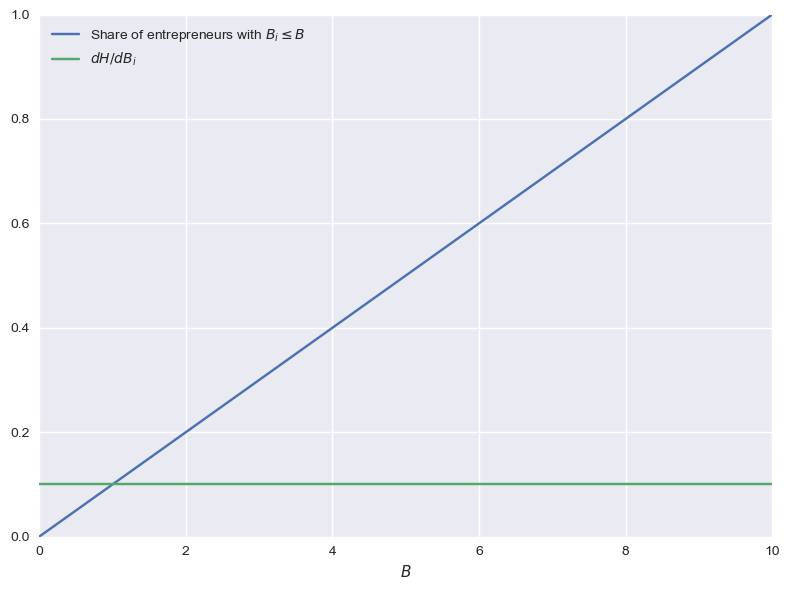

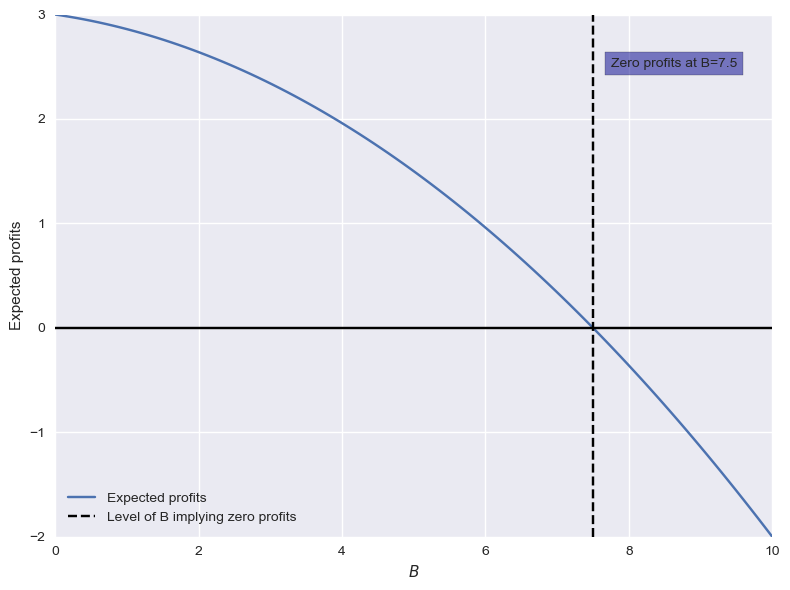

In [21]:
fig = plt.figure(frameon=False, figsize=(8, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, rv.cdf(x))
ax.plot(x, rv.pdf(x))
ax.set_xlim([LowerBound, UpperBound])
ax.set_ylim([0, 1])

# Labels:
ax.set_xlabel('$B$')
#ax.set_ylabel('Share of entrepreneurs with $B_i\leq B$')
plt.legend(('Share of entrepreneurs with $B_i\leq B$', '$dH/dB_i$'),
           loc='upper left')

# Add a cool layout
fig.tight_layout()

fig2 = plt.figure(frameon=False, figsize=(8, 6), dpi=100)
ax2 = fig2.add_subplot(1, 1, 1)
ax2.plot(x,Exp_profits)
ax2.set_xlim([LowerBound, UpperBound])
ax2.set_ylim([math.floor(min(Exp_profits)), math.ceil(max(Exp_profits))])
ax2.set_xlabel('$B$') 
ax2.set_ylabel('Expected profits')
plt.axvline(x=Zero_profits, color='k', linestyle='--')
plt.axhline(y=0, color='k')

plt.legend(('Expected profits' , 'Level of B implying zero profits' ),
          loc='lower left')
plt.text(Zero_profits+0.25, (math.ceil(max(Exp_profits))-math.floor(min(Exp_profits)))/2, 'Zero profits at B='+str(Zero_profits), bbox=dict(facecolor='darkblue', alpha=0.5))

fig2.tight_layout()

## Q: Show a number of results:
1. Proportion of high-quality borrowers is endogenous and depends on $R_b$.
2. Adverse selection reduces quality of lending
3. externality among types: Presence of low-quality borrower forces lender to charge interest rate, generating strictly positive profits on high-quality types.
4. Show an example of 'bad lemons' breaking down the market.

The first 3 are answered straightforwardly:

* A high quality borrower, is one that behaves. The share of high quality borrowers is defined as $H(\Delta p R_b)$. If $R_b$ increases, so does this share.
* Adverse selection means that the lender cannot e.g. **only** offer the contract $R_b$ to certain types / offer individual contracts based on their types $R_b^i(B_i)$. 

Lastly, we give an example where the market breaks down. All we need for the market to break down, is to find a scenario where profits of the lender is negative:

* Assume that $p_L=0$, and that borrowers are **uniformly distributed** that is $H(B) = B/\bar{B}$, for $B\in[0,\bar{B}]$.
* In this case the expected profits are given by:

$$\begin{align}
    \pi(R_b) &= \overbrace{\dfrac{\Delta p R_b}{\bar{B}}}^{\equiv H(\Delta p R_b)} p_H (R-R_b)-I  \\ 
             &= \dfrac{p_H R_b}{\bar{B}}p_H(R-R_b)-I.
\end{align} $$

The profit maximizing level of $R_b$ is then given by: $R_b^* = R/2$, which yields profits of

$$\begin{align} 
    \pi(R_b^*) &= \dfrac{p_H R/2}{\bar{B}}p_H\left(R-\dfrac{R}{2}\right)-I \\
               &= \dfrac{p_H^2R^2}{4\bar{B}}-I.
\end{align} $$ 

Thus as long as $I>p_H^2R^2/(4\bar{B})$ the market breaks down.

# Exercise 13.1 JT: Improved governance

The setup in this exercise:

* Two period model, $t=0,1$.
* Continuum of entrepreneurs with initial wealth $(A)$ distributed with the CDF $G(A)$ with support on $[0,I]$.
* At time $t=0$: Entrepreneurs can invest $I$ and borrow $(I-A)$ or invest in other firms.
* Entrepreneurs are risk neutral and thus have utility $u_e=c_0+c_1$.
* As before: Receive $R$ is investment is successful, with probability $p_H$ if entrepreneur behaves or $p_L$ if he shirks (misbehaves). Shirking yields private benefits of $B$.
* Now add consumers: Behavior results in an increasing savings function $S(r)$, with $S(r)=0$ for $r<0$.


## Q1: When are projects financed?

Consider the entrepreneur again (similar to the exercises above): 

* He behaves if (IC) holds:

$$\begin{align}
    (\Delta p)R_b\geq B. \tag{IC}
\end{align}$$

* If (IC) holds profits are given by:

$$\begin{align}
    p_H\left(R-\dfrac{B}{\Delta p}\right). \tag{IC, $\pi$}
\end{align}$$

* Lenders will finance project as long as profits are larger than alternative cost:

$$\begin{align}
    (1+r)(I-A)\leq p_H\left(R-\dfrac{B}{\Delta p}\right), \tag{IR}
\end{align}$$

where the LHS is the profit from saving (alternative cost w. rent r) and the RHS is the profit from investing with a loan contract such that the (IC) constraint holds with equality.


* As we saw earlier the solution depends on the level $A$. All $A>A^*$ such that (IR) holds are financed.

## Q2: Give the expression determining the interest rate r. How does it change if investor protection improves (interpreted as fall in B)?

The **supply** side of the financial market consists of consumers with savings function $S(r)$ and entrepreneurs who do not get extended credit to carry out the project, i.e. all $A<A^*$. Thus:

$$\begin{align}
    \tilde{S}(r) = S(r)+\int_0^{A^*(r)}A\mbox{ }dG(A)
\end{align}$$

The **demand** side of the financial market consists of entrepreneurs with $A\geq A^*$:

$$\begin{align}
    D(r) = \int_{A^*(r)}^I (I-A)\mbox{ }dG(A)
\end{align}$$


Equilibrium balances demand and supply, i.e. $D(r)=\tilde{S}(r)$.


**Investor protection improves:** ($B$ falls)

* Motive for not behaving drops for all entrepreneurs. Thus entrepreneurs that were before marginally unprofitable to invest in, now increase the *pledgeable income* they can promise investors. In other words; the IC constraint is easier to satisfy, $R_b$ is lower.
* This lowers the threshold $A^*$, i.e. more entrepreneurs are extended credit. Demand increases.
* For supply to increase and adjust to the higher demand, the interest rate increaes. 


**An extra comment on the model, The balance-sheet channel:**
Note that in this model, a marginal change in r has the effect on supply:

$$\begin{align}
    S'(r)+A^*(r)g(A^*(r))\dfrac{\partial A^*(r)}{\partial r}>0.
\end{align}$$
If $r$ increaess, less investment projects are profitable $\Rightarrow$ supply increases. The effet on demand is given by 

$$\begin{align}
    -(I-A^*(r))dg(A^*(r))\leq 0
\end{align}$$

The implication is that *shocks that shift demand upwards (downwards) and supply downwards (upwards) can lead to large fluctuations in investment, without significant changes in the interest rate (r)*. Large fluctuations in investment, but small changes in r, is a stylized fact; something that we observe.

# Exercise from PS: Adverse selection with heterogenous ability

## The setup:

* Continuum of risk-neutral entrepreneurs (same initial $A$)
* Investment cost of cost $I$ (where $I>A$) yields $R$ in return w. probability $p$. Otherwise $0$ return.
* Agents differ in the probability of success $p$. Is distributed on $[0,1]$ according to the pdf function $f(p_i)$. (As usual $F(p)$ is the share of agents w. $p_i\leq p$. $f(p)$ is the marginal change in that probability around $p_i=p$.)
* Total supply of loanable funds is simply presented by the increasing function $S(r)$. 
* This $S(r)$ is supplied by a competetive market (e.g. banks).
* Assume perfect information.
* Compared to before: No assumption of private benefits from not behaving.

## Q1: Individual rationality constraint, given that the agent has the choice between investment $I$ or depositing $A$. 

This is straightforwardly given by:

$$\begin{align}
    p(R-R_b(p)) \geq (1+r)A \tag{IR}
\end{align}$$

Note that we assume that the payment $R_b$ may depend on $p$, as we assume **perfect information** for now. Note here:

* The LHS denotes profits from the investments after paying $R_b(p)$ on loan if successful. Otherwise zero. 
* The RHS denotes the value of depositing $A$ at interest rate $r$.

## Q2: Write equations determining the riskless rate $r$, the identity of the marginal investor, and the zero (marginal) profit for the bank.

Let us start by imposing **zero profits** for the banks:

$$ \begin{align}
pR_b(p) = (1+r)(I-A), && \forall p \tag{ZP}
\end{align}$$

where $pR_b(p)$ is the payment if the project is successful, and the cost is the alternative cost of the loan: $(1+r)(I-A)$. Denote for now $B\equiv I-A$ the loan given by the bank. Note once again that the perfect information assumption implies that the zero profits hold for all $p$. 

The **marginal investor** is given by the $\bar{p}$, where the IR constraint exactly holds. Imposing the zero profits condition we then have:

$$\begin{align} 
  \bar{p}R-\underbrace{(1+r)(I-A)}_{\equiv \bar{p}R_b(\bar{p})\text{ from (ZP)}}=(1+r)A && \Rightarrow && \bar{p}(r) = \dfrac{1+r}{R}I
\end{align}$$

Finally the **riskless rate (r)** (it is riskless, due to the perfect information assumption) is determined by the equilibrium condition; i.e. that demand equals supply. With the threshold $\bar{p}$ all entrepreneurs who have a larger probability of success than the level $\bar{p}$, where profits are zero and (IR) holds with equality.

Recall that $f(p)$ denoted the distribution of the entrepreneurs. Thus demand for credit is extended to all entrepreneurs with $p\geq \bar{p}$, or:

$$\begin{align}
    D(r) = \int_{\bar{p}(r)}^1(I-A)f(p)\mbox{ }dp
\end{align}$$

Supply is given by the *aggregate supply function* $S(r)$, as well as the initial wealth $(A)$ from the entrepreneurs who do not obtain credit to carry out their investment. Define this new *total* supply function $\tilde{S}(r)$:

$$\begin{align}
    \tilde{S}(r) = S(r) + \int_0^{\bar{p}(r)} A f(p)\mbox{ }dp
\end{align}$$

## Q3: Confirm that only projects with positive net present value are carried out.

This is given, as banks have a zero profits condition, and entrepreneurs have the IR condition.

## Q4: Assume p is not observable. Compute equilibrium lending contract, the idendity of the marginal investor and show that there is overinvestment.

Now that the banks cannot observe $p$, they cannot make the contracts contingent on $p$. Thus they can only propose one contract, offering $R_b^*$ if the project is successful. Let $p^*$ denote the marginal investor now. From the IR constraint (with equality) we get:

$$\begin{align} 
    p^*(R-R^*_b)=(1+r)A \tag{IR*}
\end{align}$$

Zero profits for the bank:

$$\begin{align}
    \int_{p^*}^1 p R_b^*f(p)\mbox{ }dp = \left(1- F(p^*)\right)(1+r)(I-A). 
\end{align}$$

The LHS gives the payout to successful projects. The RHS is the alternative cost of the loan contracts. Note that $1-F(p^*)$ is the share of entrepreneurs with $p\geq p^*$. 

Note that we can define this as the **conditional expected value**:

$$\begin{align}
    \dfrac{\int_{p^*}^1 p R_b^*f(p)\mbox{ }dp}{1- F(p^*)} \equiv R_b^* \mathbb{E}\left[p|p\geq p^*\right] = (1+r)(I-A).  \tag{ZP*}
\end{align}$$

Combining the zero profits, and the marginal investor identity we then have:

$$\begin{align}
        (1+r)A&= p^*R-p^*R_b^* \\
              &= p^*R-R_b^* \mathbb{E}\left[p|p\geq p^*\right] \dfrac{p^*}{\mathbb{E}\left[p|p\geq p^*\right]} \\ 
              &= p^*R-(1+r)*(I-A)*\dfrac{p^*}{\mathbb{E}\left[p|p\geq p^*\right]}
\end{align}$$

where the last line uses $(IR^*)$.

Rearranging this expression we get:

$$\begin{align}
    p^*R = I (1+r)\dfrac{p^*}{\mathbb{E}\left[p|p\geq p^*\right]}+A(1+r)\left[1-\dfrac{p^*}{\mathbb{E}\left[p|p\geq p^*\right]}\right]\leq (1+r)I \tag{Marginal*}
\end{align}$$


The RHS is a linear combination of $(1+r)I$ and $(1+r)A$. Compared to this the marginal investor was defined by $\bar{p}R=(1+r)I$ previously. As $I>A$ this establishes the inequality in (Marginal$^*$). Finally this entails directly that $p^*\leq \bar{p}$.

This inequality entails **overinvestment**:

* When $p$ is observed by the bank, the marginal investor is identified, such that *marginal* profits are zero.
* When $p$ is not observed by the bank, the marginal investor is identified, such that *average* profits are zero. 
* Thus credit is extended to types that are unprofitable, $p^*\leq \bar{p}$.